![alt text](https://cdn.pixabay.com/photo/2017/06/16/07/26/under-construction-2408062_960_720.png "Logo Title Text 1")

#### Before you move ahead:
The contents of this blog are quite old. I'm putting together my old algorithm notes in one place mainly to test this React component. These notes are super rough.

# Roadmap

* 1. What is recursion and where do beginners struggle?
* 2. Mental models to help with recursion
* 3. Easy Problem
* 4. Medium Problem
* 5. Hard Problem

# 1. What is recursion and where do beginners struggle?
In computer science, recursion is usually when a function calls itself repeatedly. Assuming that any person that stumbles across this blog has some experience in programming, I'll directly address the most common issue that I've seen students face. 

During my time at the university, I used to be the head of a competitive programming club. I had to teach a lot of first and second-year computer engineering students on how to design good and efficient algorithms. I tried to recognize the list of issues that most students had when designing an algorithm (simplest to hardest):

* 1. How to start with a recursive function
* 2. How to communicate between recursive calls
* 3. Exit conditions

I'll address these questions and also introduce some nice mental models to build a good foundation

# 2. Mental models to help with recursion
A significant number of students just straight out did not know where to start the code for a recursive problem. They instinctively try to come up with a solution that covers all levels of recursion, in a single go i.e. they skip the unrolling of a recursive call and directly try to formulate a recursive function with extremely inchoate mental models. 

I beleive that developing strong mental models are prerequisite to effective learning. If you have no mental model then you will struggle with problem-solving. If you have isolated mental models (i.e. those which you haven't been able to connect with other concepts) then you will probably forget that concept in a very short time. 

Here is how one could start with a recursion problem:
* 1. Write a function that solves the first 3 steps of the recursion separately. Hard code the returns
* 2. Express these steps in the form of previous steps. It should be pretty easy now.
* 3. Use a parameter to switch between 2 previous steps. Try to make the usage generalized 
* 4. Write the exit statement


Let's start with the simplest problem and work our way up to some tougher problems

# Level: EASY
## Fibonacci

Example:
Fibonacci series goes something like this:
0, 1, 1, 2, 3, 5, 8, 13, 21 ...

here each term is the sum of the previous two.

Here is how we will start:

In [19]:
def step0():return 0
def step1():return 1
def step2():return 1
# first three terms are 0, 1, 1

#### Try to define step 2 as a combination of previous steps

In [22]:
# step2 unified, version 1
# abbreviated as s2v1
def s2v1(): return step1()+step0()

In [23]:
# notice both are same
step2(), s2v1()

(1, 1)

#### Try to write step 0 and step 1 as a single function with step number as the input

In [25]:
# step 0-1 version 1
def s01v1(step):
    if step == 0: return 0
    if step == 1: return 1

In [26]:
def s2v2():
    return s01v1(0)+s01v1(1)

In [28]:
# notice all three are same
step2(), s2v1(), s2v2()

(1, 1, 1)

#### Now try to write s2v2() but as a function of a step

In [29]:
def s2v3(step):
    return s01v1(step-2)+s01v1(step-1)

In [30]:
# notice all 4 are same
step2(), s2v1(), s2v2(), s2v3(2)

(1, 1, 1, 1)

#### Was reaching here easy? Now just reference self as you have been able to get the basic structure out!

In [34]:
def s2v4(step):
    return s2v4(step-2)+s2v4(step-1)

#### What would happen if we run s2v4?
This will throw an error as we haven't written the right exit conditions. Not writing exit conditions will either result in an error or infinite recursion.

In [35]:
s2v4(3)

RecursionError: maximum recursion depth exceeded

#### This brings us to step 4. Write proper exit conditions!
Now the trick to writing exit conditions is super simple. Once you have been able to find a structure of the code that is expressed as itself, you can simply hardcode the base conditions into the function at the start!

We have 2 base conditions:
* 1. f(0) = 0
* 2. f(1) = 1

Go ahead and hardcode them. Then you are pretty much done. 

In [36]:
def s2v5(step):
    if step == 0: return 0 # base condition 1
    if step == 1: return 1 # base condition 2
    return s2v5(step-2)+s2v5(step-1)

In [38]:
# You can use a simple list comprehension to check your recursion
[s2v5(n) for n in range(10)]

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]

# Level: MEDIUM
## String Reversal

Given a string, use recursion to print its reverse.

"Shiv is cool" should become "looc si vihS"

This is a little different as the steps aren't immediately apparent to us! Go ahead anyways and define steps (even if you think they are wrong)

Here is how we could do it:

In [45]:
# format of naming: (s)tep (n) (v)ersion (r)
def s0v0():return 'l'
def s1v0():return 'lo'
def s2v0(): return 'loo'

#### Can we try to unify step 2 with step 1 and 0?

In [49]:
def s2v1():
    return s1v0()+'o'
s2v1()
# We don't even need step 0 here!

'loo'

#### In fact, this brings us to another lesson in unrolling a recursive equation:
Always work with the number of steps that are required to produce the nth step. For a Fibonacci, you needed to express step n in terms of step n-1 and n-2. Here you can clearly see that we need to only express step n in terms of step n-1.

The thumb rule should be that you always work with the base case and one step ahead of the base case!

#### So let's ignore step 2 and work with step 0 and 1.

In [51]:
def s1v1():
    return s0v0()+'o'
s1v1()

'lo'

#### Now express step0 and step1 as a function of step.
Here the step is not apparent. Usually, the input parameter should act as the step number. As long as you can derive the step number from the input parameters, we are good to go!

Here we can pass in a string as a step id. Now if a string, "step" acts as an alias for step n then you gotta work on what does the string look like if you wanna get an alias for step n-1.

An even better question would be, how is the string "step" used as an id in the nth step?
We can clearly see that the hardcoded functions are using n-th last character from the end. Step 0 is using char(n-0) step 1 is using char(n-1) and so on. One way to encode this is by using the length of the string as one of the input params. But a better way would be to recognize that the remaining string is being used by the inner function (step0).

In [57]:
def s0v1(string):
    # returning the last charachter
    return string[0]
def s1v2(string):
    # imagine this as: return func("tep")+"s"
    return s0v1(string[1:])+string[0]

In [58]:
# Cool. We have reversed "ol"
s1v2("ol")

'lo'

#### Now we simple express s1v2 in its own terms and add an exit condition.

In [65]:
def s1v3(string):
    if len(string) == 0: return "" # exit condition. When string ends return empty char
    return s1v3(string[1:])+string[0]

In [66]:
s1v3("Shiv is cool")

'looc si vihS'

# Level: HARD AS F***
## Minimum Cost Polygon Triangulation

Just skip this section entirely if you are still completely new to programming and computer science in general. This deals with a pretty tough problem in recursion but will require patience. 

A triangulation of a convex polygon is formed by drawing diagonals between non-adjacent vertices (corners) such that the diagonals never intersect. The problem is to find the cost of triangulation with the minimum cost. The cost of triangulation is a sum of the weights of its component triangles. Weight of each triangle is its perimeter (sum of lengths of all sides)

![alt text](https://media.geeksforgeeks.org/wp-content/uploads/triangulation.jpg "Min Cost Triangulation")

* note that in the image the co-ordinate right of (0,0) should be (1,0) and not (1,2)

(src: https://www.geeksforgeeks.org/minimum-cost-polygon-triangulation/)

For the above-given polygon, the possible triangulations are given above.
For example, we see that in both the polygons, we have 3 triangles and their cost will be something like this:

In [76]:
import math
def dist(c1,c2):
    # standard distance formula
    return math.sqrt((c1[0]-c2[0])**2+(c1[1]-c2[1])**2)

# lambda to calculate perimeter of the triangle
peri = lambda l: sum([dist(l[0], l[1]) + dist(l[1], l[2]) + dist(l[0], l[2])])

# a list of 3 triangles with 3 tuples in each sub-list
triangulation_left = [
    [(0,2), (1,2), (0,0)], # tr 1
    [(1,2), (0,0), (1,0)], # tr 2
    [(1,2), (2,1), (1,0)] # tr 3
]

triangulation_right = [
    [(0,2), (1,2), (0,0)], # tr1
    [(1,2), (0,0), (2,1)], # tr 2
    [(1,0), (2,1), (0,0)] # tr 3
]

# cost of left and right
sum([peri(l) for l in triangulation_left]), sum([peri(l) for l in triangulation_right])

# triangulation on the left is cheaper than triangulation on the right hence that's the answer

(15.30056307974577, 15.77269903474535)

#### What to do when recursion is not at all obvious?
This problem looks completely different from the previous two and has no obvious hint for recursion. A good mental model to use here would be that of a "generator". Can you write a generator of sorts that can spit out the combination of all triangulations? Once you get all the triangulations you are pretty much good to go. You just need to find the cost of each triangulation and you will be sorted.

One approach for a generator can be:
* Select a point inside the polygon (can be any).
* Draw a diagonal from that point to any other non-adj point and divide the poly into two polygons.
* Assume you know the minimum triangulation for these polygons. Now, repeat the process until all diagonals are covered from that point.
* Finally, get the costs out for each polygon and then pick the least as the answer.

This will be computationally very heavy but we can ignore optimization for this part

#### This can be better highlighted with the help of an example:

Assume that (1,2) is the random starting point

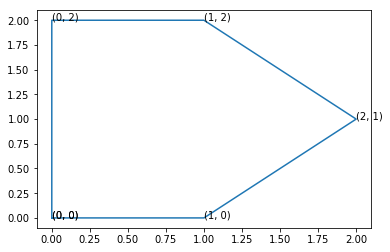

In [96]:
import matplotlib.pyplot as plt
coord = [(0,0), (0,2), (1,2), (2,1),(1,0)]
coord.append(coord[0])
xs, ys = zip(*coord)
plt.figure()
plt.plot(xs,ys)
for i_x, i_y in zip(xs, ys):
    plt.text(i_x, i_y, '({}, {})'.format(i_x, i_y))
plt.show()

#### Divide it into 2 polygons like this:

### Poly 1

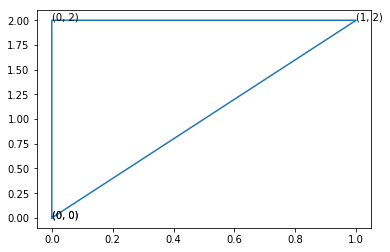

In [95]:
coord = [(0,0), (0,2), (1,2)]
coord.append(coord[0])
xs, ys = zip(*coord)
plt.figure()
plt.plot(xs,ys) 
for i_x, i_y in zip(xs, ys):
    plt.text(i_x, i_y, '({}, {})'.format(i_x, i_y))
plt.show()

### Poly 2

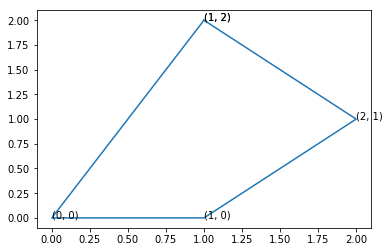

In [94]:
coord = [(1,2), (2,1),(1,0), (0,0)]
coord.append(coord[0])
xs, ys = zip(*coord)
plt.figure()
plt.plot(xs,ys) 
for i_x, i_y in zip(xs, ys):
    plt.text(i_x, i_y, '({}, {})'.format(i_x, i_y))
plt.show()

The above 2 polygons are equivalent to splitting the original polygon along the diagonal (1,2) and (0,0). At this point assume we have some magic function that already knows the minimum cost of these polygons. Then the problem is reduced to trying out all combinations of polygon split from the given vertex and maintaining a list of their cost.

In [106]:
# utopian function for min cost:
def utopian(poly_list):
    # this function doesn't exist yet
    return 42

coordinate_list = [(0,0), (0,2), (1,2), (2,1),(1,0)]
pivot_coordinate = (0,0) # zeroth element of the list

# two possible splits:
for ind, coors in enumerate(coordinate_list[1:]):
    poly1 = [pivot_coordinate]+coordinate_list[1:][:ind+2]
    poly2 = [pivot_coordinate]+coordinate_list[1:][ind+1:]
    if len(poly1) == len(coordinate_list) or len(poly1)< 3 or len(poly2) == len(coordinate_list) or len(poly2)< 3:
        continue
    print(poly1)
    print(poly2)
    print("------------------------------")        

[(0, 0), (0, 2), (1, 2)]
[(0, 0), (1, 2), (2, 1), (1, 0)]
------------------------------
[(0, 0), (0, 2), (1, 2), (2, 1)]
[(0, 0), (2, 1), (1, 0)]
------------------------------


It is quite easy to see how we could solve this problem now! If we can divide the polygons, then each polygon can be further subdivided recursively. This is how we can do it:

In [129]:
def min_poly_sum(polygon_points):
    # exit condition would be that when polygon only has 3 points, return its perimeter as the answer
    if len(polygon_points) == 3:
        return peri(polygon_points)
    
    # Keep shifting the pivot to cover all cases
    for ind in range(len(polygon_points)):
        pivot = polygon_points[0] # pick point 0 as the pivot
        min_cost_list = []
        for ind, coors in enumerate(polygon_points[1:]):
            poly1 = [pivot]+polygon_points[1:][:ind+2]
            poly2 = [pivot]+polygon_points[1:][ind+1:]
            if len(poly1) == len(polygon_points) or len(poly1)< 3 or len(poly2) == len(polygon_points) or len(poly2)< 3:
                continue
            cost1 = min_poly_sum(poly1)
            cost2 = min_poly_sum(poly2)
            min_cost_list.append(cost1+cost2)
        polygon_points = polygon_points[1:]+[polygon_points[0]]
    return min(min_cost_list)

In [130]:
import time
start = time.time()
print("Min cost of triangulation is:",min_poly_sum(coordinate_list))
print("Finished in: ", time.time()-start)

Min cost of triangulation is: 15.30056307974577
Finished in:  0.0049707889556884766


# Conclusion
Although the timing of the above problem might seem quite insignificant, it's actually inefficient with large polygons. This can be improved if intermediate computations can be saved temporarily and not computed. That's where dynamic programming comes in. Maybe I'll explore them some other time.

![alt text](https://is1-ssl.mzstatic.com/image/thumb/Music118/v4/bd/b7/50/bdb750d9-a7cb-7db9-7ce8-2996bca2cdf0/cover.jpg/268x0w.jpg "Logo Title Text 1")


